## Table of content

1. [Batsman stats](#1)
    * [Most balls faced](#1a)
    * [Scored most runs](#1b)
    * [Hit most boundaries](#1c)
    * [Highest strike rate and average](#1d)
2. [Bowler stats](#2)
    * [Bowled most balls](#2a)
    * [Took most wickets](#2b)
    * [Bowled most dot balls](#2c)
3. [Distribution](#3) 
    * [Runs in both innings](#3a)
    * [Wickets in both innings](#3b)
    * [Extras](#3c)
4. [Top fielders](#4)
5. [Powerplay performace](#5)
    * [Teams](#5a)
    * [Players](#5b)
6. [Death overs performace](#6)
    * [Teams](#6a)
    * [Players](#6b)
7. [Stadium](#7)
    * [India](#7a)
    * [UAE](#7b)
8. [Most MOMs](#8)
9. [Win Margin and Match-Win %](#9)
10. [Toss](#10)
    * [Team to win most toss](#10a)
    * [What do teams choose after winning the toss?](#10b)
    * [How grounds affect toss decisions](#10c)
    * [Does winning the toss, help you win the game?](#10d)
11. [Average Runs scored in both innings in all seasons](#11)  
12. [200+ in the 1st Innings](#12)
    * [How many times have teams scored 200+](#12a)
    * [Outcome of those matches](#12b)
13. [Distribution of runs in all seasons](#13)     
14. [Average runs given in all overs by teams](#14)     

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px 
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim 

In [2]:
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

def size(num):
    s = [i*10 for i in range(num,0,-1)]
    return s  

In [3]:
df = pd.read_csv("/kaggle/input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv")
df.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
df1 = pd.read_csv("/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv")
df1['season'] = df1['date'].str[:4].astype(int)
df1.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008


Preprocessing

In [5]:
df1.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad",inplace=True)
df1.replace(to_replace ="Bangalore", value ="Bengaluru",inplace=True)
df1.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants",inplace=True)
df1.replace(to_replace ="Pune Warriors", value ="Rising Pune Supergiants",inplace=True)
df1.replace(to_replace ="M Chinnaswamy Stadium", value ="M.Chinnaswamy Stadium",inplace=True)
df1.replace(to_replace ="Subrata Roy Sahara Stadium", value ="Maharashtra Cricket Association Stadium",inplace=True)
df1.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals",inplace=True)
df1.replace(to_replace ="Punjab Cricket Association IS Bindra Stadium, Mohali", value ="Punjab Cricket Association Stadium, Mohali",inplace=True)
df.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad",inplace=True)
df.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals",inplace=True)
df.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants",inplace=True)
df.replace(to_replace ="Pune Warriors", value ="Rising Pune Supergiants",inplace=True)

In [6]:
df2 = df1[['id','season']].merge(df, left_on = 'id', right_on = 'id', how = 'left')
df2.head(3)

,id,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [7]:
city = df1.city.unique()# to get uniques cities
city = city.tolist()
del city[-5]# nan value was present at this index
UAE = ['Dubai', 'Sharjah', 'Abu Dhabi']
SA = ['Cape Town', 'Port Elizabeth', 'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein']
IND = ['Bengaluru', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur', 'Hyderabad', 'Chennai','Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Rajkot', 'Kanpur']

## Batsman stats - Faced most balls, Scored most runs and Hit most boundaries<a id="1"></a>


### Batsman who faced most balls<a id="1a"></a>

In [8]:
fig = go.Figure([go.Bar(x=df['batsman'].value_counts().index.tolist()[:11], y= df['batsman'].value_counts().tolist()[:11],marker=dict(color=random_colors(10), line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Batsmen who faced most balls',xaxis=dict(title='Batsmen',tickmode='linear'),yaxis=dict(title='Balls Faced'))
fig.update_layout(layout)
iplot(fig)

### Batsman with most runs<a id="1b"></a>

In [9]:
l = [];l1 = [];l2 = []
for player in df.batsman.unique():
    l.append((player,sum(df[df['batsman']==player]['batsman_runs'].values) ))
l.sort(key=lambda x: x[1])
a = l[-10:]
a.reverse()
for i in a:
    l1.append(i[0])
    l2.append(i[1])

fig = go.Figure([go.Bar(x=l1, y= l2,text = l2,textposition='outside',marker=dict(color=random_colors(10), line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Most runs scored',xaxis=dict(title='Batsmen',tickmode='linear'),yaxis=dict(title='Runs'))
fig.update_layout(layout)
iplot(fig)

### Batsman who hit most boundaries<a id="1c"></a>

In [10]:
four = df[df['batsman_runs'] == 4]['batsman'].value_counts()[:10]
six = df[df['batsman_runs'] == 6]['batsman'].value_counts()[:10]
fig = make_subplots(rows=2, cols=1, subplot_titles=("Most fours hit", "Most sixes hit"))

fig.append_trace(go.Scatter(
    x=four.index,
    y=four.values,
    mode='markers',
    name = 'Fours',
    marker=dict(size=size(10),color = '#bd207b')
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=six.index,
    y=six.values,
    mode='markers',
    name = 'Sixes',
    marker=dict(size=size(10),color = '#1c5ead')
), row=2, col=1)
iplot(fig)

### Batsman who have highest strike rate and average(30+ matches)<a id="1d"></a>

In [11]:
bat = df.groupby(['batsman','id']).agg({'ball':'count','batsman_runs':'sum'})
bat = bat.groupby(['batsman']).agg({'count','mean','sum'})
bat.columns = ['total_matches1', 'mean_balls_faced','total_balls_faced','total_matches2','mean_runs','total_runs']
bat['rate'] = (bat['total_runs']*100)/bat['total_balls_faced']
high_avg = bat[bat['total_matches1']>=30].sort_values(by='total_runs',ascending=False)[:10]
high_rate = bat[bat['total_matches1']>=30].sort_values(by='rate',ascending=False)[:10]
fig = make_subplots(rows=2, cols=1, subplot_titles=('Highest Strike Rate','Highest Average'))

fig.add_trace(
    go.Scatter(x=high_rate.index, y=high_rate['rate'], mode='markers', marker=dict(size=size(10),color = '#f79902'),line=dict(color='#000000',width=15), name = 'Strike rate'),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=high_avg.index, y=high_avg['mean_runs'], mode='markers', marker=dict(size=size(10),color = '#7d1dde'),line=dict(color='#000000',width=15), name = 'Average'),
    row=2, col=1)

iplot(fig)

## Bowler stats - Bowled most balls, Took most wickets and Bowled most dot balls<a id="2"></a>

### Bowler who bowled most balls<a id="2a"></a>

In [12]:
fig = go.Figure([go.Bar(x=df['bowler'].value_counts().index.tolist()[:11], y= df['bowler'].value_counts().tolist()[:11],marker=dict(color=random_colors(10), line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Bowler who bowled most balls',xaxis=dict(title='Bowler',tickmode='linear'),yaxis=dict(title='Balls Bowled'))
fig.update_layout(layout)
iplot(fig)

### Bowlers with most wickets<a id="2b"></a>

In [13]:
l3 = [];l4 = []
wickets_by_bowler = ['caught', 'bowled', 'lbw', 'stumped', 'hit wicket', 'caught and bowled']
w = df[df['dismissal_kind'].isin(wickets_by_bowler)]['bowler'].values
diss = [(i,w.tolist().count(i)) for i in set(w)]
diss.sort(key=lambda x: x[1])
b = diss[-10:]
b.reverse()
for i in b:
    l3.append(i[0])
    l4.append(i[1])
 
fig = go.Figure([go.Bar(x=l3, y= l4,text = l4,textposition='outside',marker=dict(color=random_colors(10), line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Most wickets taken',xaxis=dict(title='Bowler',tickmode='linear'),yaxis=dict(title='Wickets'))
fig.update_layout(layout)
iplot(fig)

### Bowler who bowled most dot balls<a id="2c"></a>

In [14]:
dot = df[df['total_runs'] == 0]['bowler'].value_counts()[:10]
fig = go.Figure(data=go.Scatter(x=dot.index, y=dot.values, mode='markers+lines'))
layout = go.Layout(title = 'Most dot balls bowled',xaxis=dict(title='Bowlers',tickmode='linear'),yaxis=dict(title='Number of dot balls'))
fig.update_layout(layout)
iplot(fig)

## Distribution of - Runs, Wickets and Extras<a id="3"></a>

### Distribution of Runs in both innings<a id="3a"></a>

In [15]:
dist = [];inn1 = [];inn2 = []
for inn in [1,2]:
    for run in [1,2,3,4,5,6]:
        a = df[(df['inning']==inn) & (df['batsman_runs']==run)]
        dist.append((inn,run,len(a)))
for i in dist[:6]:
    inn1.append(i[2])
for i in dist[6:]:
    inn2.append(i[2])    
labels = ['1','2','3','4', '5', '6']

fig = make_subplots(
    rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
    subplot_titles=("Inning 1", "Inning 2"))

fig.add_trace(go.Pie(labels=labels, values=inn1, scalegroup='one',name = '1st Inning'), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=inn2, scalegroup='one', name = '2nd Inning'), 1, 2)

fig.update_layout(title_text='Run Distribution')
iplot(fig)

### Distribution of Wickets in both innings<a id="3b"></a>

In [16]:
dist = [];inn1 = [];inn2 = []
for inn in [1,2]:
    for wic in ['caught', 'run out', 'bowled', 'lbw',
       'stumped', 'caught and bowled', 'hit wicket']:
        a = df[(df['inning']==inn) & (df['dismissal_kind']==wic)]
        dist.append((inn,run,len(a)))
for i in dist[:8]:
    inn1.append(i[2])
for i in dist[8:]:
    inn2.append(i[2])    
labels = ['caught', 'run out', 'bowled', 'lbw',
       'stumped', 'caught and bowled', 'hit wicket']

fig = make_subplots(
    rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
    subplot_titles=("Inning 1", "Inning 2"))

fig.add_trace(go.Pie(labels=labels, values=inn1, scalegroup='one',name = '1st Inning'), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=inn2, scalegroup='one',name = '2nd Inning'), 1, 2)

fig.update_layout(title_text='Dismissal Distribution')
iplot(fig)

### Distribution of Extras<a id="3c"></a>

In [17]:
extras = df[df['extra_runs'] != 0]['extra_runs'].value_counts()
fig = go.Figure(data=[go.Pie(labels=extras.index, values=extras.values)])
layout = go.Layout(title = 'Extras distribution')
fig.update_layout(layout)
iplot(fig)

## Fielder who caused most dismissals(Catches, Stumpings and Run Outs)<a id="4"></a>

In [18]:
catch = df[df['dismissal_kind']=='caught']['fielder'].value_counts()
fig = go.Figure([go.Bar(x=catch.index[:10], y=catch.values[:10],marker=dict(color=random_colors(10), line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Most catch taken by a fielder',xaxis=dict(title='Fielders',tickmode='linear'),yaxis=dict(title='Catches'))
fig.update_layout(layout)
iplot(fig)

In [19]:
stumping = df[df['dismissal_kind']=='stumped']['fielder'].value_counts()
fig = go.Figure([go.Bar(x=stumping.index[:10], y=stumping.values[:10],marker=dict(color=random_colors(10), line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Most stumpings by a keeper',xaxis=dict(title='Wicket Keepers',tickmode='linear'),yaxis=dict(title='Stumpings'))
fig.update_layout(layout)
iplot(fig)

In [20]:
run_out = df[df['dismissal_kind']=='run out']['fielder'].value_counts()
fig = go.Figure([go.Bar(x=run_out.index[:10], y=run_out.values[:10],marker=dict(color=random_colors(10), line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Most run outs done by a fielder',xaxis=dict(title='Fielders',tickmode='linear'),yaxis=dict(title='Run Outs'))
fig.update_layout(layout)
iplot(fig)

## Powerplay performance by teams and players<a id="5"></a>

### Powerplay performance by teams<a id="5a"></a>

In [21]:
p_overs = [0,1,2,3,4,5];r =[];t = []
for team in df.batting_team.unique():
    runs = sum(df[(df['over'].isin(p_overs)) & (df['batting_team'] == team)]['total_runs'].values)
    r.append(runs)
    t.append(team)
    
fig = go.Figure([go.Bar(x=t, y=r,text = r,textposition='outside',marker=dict(color=random_colors(10), line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Runs scored in powerplay by teams',xaxis=dict(title='Teams',tickmode='linear'),yaxis=dict(title='Runs'))
fig.update_layout(layout)
iplot(fig)    

In [22]:
p_overs = [0,1,2,3,4,5];w =[];t = []
for team in df.batting_team.unique():
    wickets =  df[(df['over'].isin(p_overs)) & (df['batting_team'] == team) & (df['is_wicket']==1)].is_wicket.count()
    w.append(wickets)
    t.append(team)
    
fig = go.Figure([go.Bar(x=t, y=w,text = w,textposition='outside',marker=dict(color=random_colors(10), line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Wickets lost in powerplay by teams',xaxis=dict(title='Teams',tickmode='linear'),yaxis=dict(title='Wickets'))
fig.update_layout(layout)
iplot(fig)

### Powerplay performance by players<a id="5b"></a>

In [23]:
p_overs = [0,1,2,3,4,5];l = [];l1 = [];l2 = []
for man in df.batsman.unique():
    runs = sum(df[(df['over'].isin(p_overs)) & (df['batsman'] == man)]['batsman_runs'].values)
    l.append((man, runs))
l.sort(key=lambda x: x[1])
a = l[-10:]; a.reverse()
for i in a:
    l1.append(i[0])
    l2.append(i[1])    
fig = go.Figure(data = [go.Bar(x=l1, y=l2,text = l2,textposition='outside',marker=dict(color=random_colors(10), line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Runs scored in powerplay by batsman',xaxis=dict(title='Batsmen',tickmode='linear'),yaxis=dict(title='Runs'))
fig.update_layout(layout)
iplot(fig)    

In [24]:
p_overs = [0,1,2,3,4,5];l = [];l1 = [];l2 = [];wick_type = ['caught', 'bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket']
for man in df.bowler.unique():
    wickets =  df[(df['over'].isin(p_overs)) & (df['bowler'] == man) & (df['dismissal_kind'].isin(wick_type))].is_wicket.count()
    l.append((man,wickets))
    
l.sort(key=lambda x: x[1])
a = l[-10:]; a.reverse()
for i in a:
    l1.append(i[0])
    l2.append(i[1])      
    
fig = go.Figure(data = [go.Scatter(
    x=l1,
    y=l2,
    mode='markers',
    name = 'Sixes',
    marker=dict(size=size(10),color = '#e62b0e',line=dict(color='#000000',width=3))
)])
layout = go.Layout(title = 'Wickets taken in powerplay by bowlers',xaxis=dict(title='Bowlers',tickmode='linear'),yaxis=dict(title='Wickets'))
fig.update_layout(layout)
iplot(fig)

## Death overs performance by teams and players<a id="6"></a>

### Death overs performance by teams<a id="6a"></a>

In [25]:
d_overs = [16,17,18,19];r =[];t = []
for team in df.batting_team.unique():
    runs = sum(df[(df['over'].isin(d_overs)) & (df['batting_team'] == team)]['total_runs'].values)
    r.append(runs)
    t.append(team)
    
fig = go.Figure([go.Bar(x=t, y=r,text = r,textposition='outside',marker=dict(color=random_colors(10), line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Runs scored in death overs by teams',xaxis=dict(title='Teams',tickmode='linear'),yaxis=dict(title='Runs'))
fig.update_layout(layout)
iplot(fig)    

In [26]:
d_overs = [16,17,18,19];w =[];t = []
for team in df.batting_team.unique():
    wickets =  df[(df['over'].isin(d_overs)) & (df['batting_team'] == team) & (df['is_wicket']==1)].is_wicket.count()
    w.append(wickets)
    t.append(team)
    
fig = go.Figure([go.Bar(x=t, y=w,text = w,textposition='outside',marker=dict(color=random_colors(10), line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Wickets lost in death overs by teams',xaxis=dict(title='Teams',tickmode='linear'),yaxis=dict(title='Wickets'))
fig.update_layout(layout)
iplot(fig)

### Death overs performance by players<a id="6b"></a>

In [27]:
d_overs = [16,17,18,19];l = [];l1 = [];l2 = []
for man in df.batsman.unique():
    runs = sum(df[(df['over'].isin(d_overs)) & (df['batsman'] == man)]['batsman_runs'].values)
    l.append((man, runs))
l.sort(key=lambda x: x[1])
a = l[-10:]; a.reverse()
for i in a:
    l1.append(i[0])
    l2.append(i[1])    
fig1 = go.Figure([go.Bar(x=l1, y=l2,marker=dict(color=random_colors(10), line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Runs scored in death overs by batsman',xaxis=dict(title='Batsmen',tickmode='linear'),yaxis=dict(title='Runs'))
fig1.update_layout(layout)
iplot(fig1)    

In [28]:
d_overs = [16,17,18,19];l = [];l1 = [];l2 = [];wick_type = ['caught', 'bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket']
for man in df.bowler.unique():
    wickets =  df[(df['over'].isin(d_overs)) & (df['bowler'] == man) & (df['dismissal_kind'].isin(wick_type))].is_wicket.count()
    l.append((man,wickets))
    
l.sort(key=lambda x: x[1])
a = l[-10:]; a.reverse()
for i in a:
    l1.append(i[0])
    l2.append(i[1])      
    
fig = go.Figure(data = [go.Scatter(
    x=l1,
    y=l2,
    mode='markers',
    name = 'Sixes',
    marker=dict(size=size(10),color = '#3db02e',line=dict(color='#000000',width=3))
)])
layout = go.Layout(title = 'Wickets taken in death overs by bowlers',xaxis=dict(title='Bowlers',tickmode='linear'),yaxis=dict(title='Wickets'))
fig.update_layout(layout)
iplot(fig)

## Stadiums<a id="7"></a>

### Stadium location

In [29]:
geolocator = Nominatim(user_agent="Yash")
loc = []
def getCord(city_name):
    location = geolocator.geocode(city_name)
    loc.append((city_name,location.latitude,location.longitude))
for i in city:
    getCord(i)
loc

[('Bengaluru', 12.9791198, 77.5912997),
 ('Chandigarh', 30.7334421, 76.7797143),
 ('Delhi', 28.6517178, 77.2219388),
 ('Mumbai', 19.0759899, 72.8773928),
 ('Kolkata', 22.5414185, 88.35769124388872),
 ('Jaipur', 26.9154576, 75.8189817),
 ('Hyderabad', 17.38878595, 78.46106473453146),
 ('Chennai', 13.0836939, 80.270186),
 ('Cape Town', -33.928992, 18.417396),
 ('Port Elizabeth', -33.9617051, 25.6207519),
 ('Durban', -29.861825, 31.009909),
 ('Centurion', -25.836389, 28.180278),
 ('East London', -33.0191604, 27.8998573),
 ('Johannesburg', -26.205, 28.049722),
 ('Kimberley', -28.7383012, 24.7642251),
 ('Bloemfontein', -29.116395, 26.215496),
 ('Ahmedabad', 23.0216238, 72.5797068),
 ('Cuttack', 20.4686, 85.8792),
 ('Nagpur', 21.1498134, 79.0820556),
 ('Dharamsala', 32.2143039, 76.3196717),
 ('Kochi', 9.931308, 76.2674136),
 ('Indore', 22.7203616, 75.8681996),
 ('Visakhapatnam', 17.7231276, 83.3012842),
 ('Pune', 18.521428, 73.8544541),
 ('Raipur', 21.2379469, 81.6336833),
 ('Ranchi', 23.370

### INDIA<a id="7a"></a>

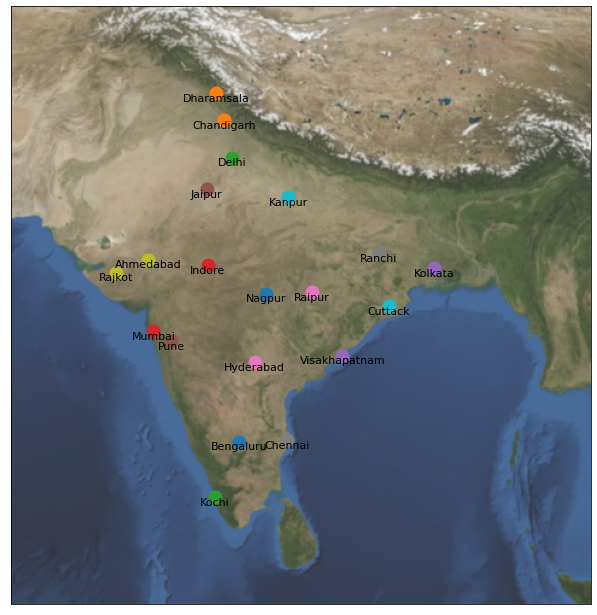

In [30]:
fig = plt.figure(figsize=(20, 11))
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=4, urcrnrlat=37,
            llcrnrlon=65, urcrnrlon=97, )

m.bluemarble(alpha = 0.8)

for c in loc:
    if c[0] in IND: 
        x,y = m(c[2],c[1])
        plt.plot(x, y, 'o', markersize=13)
        plt.text(x, y, c[0], fontsize=11,horizontalalignment='center',verticalalignment='top')

In [31]:
data = [go.Histogram(x = df1[df1['city'].isin(IND)].city,marker=dict(color='#348feb', line=dict(color='#000000', width=2)))]
layout = go.Layout(title = 'Mumbai hosted the most matches followed by Bengaluru',xaxis=dict(title='Indian Cities',tickmode='linear'),yaxis=dict(title='Count'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### UAE<a id="7b"></a>

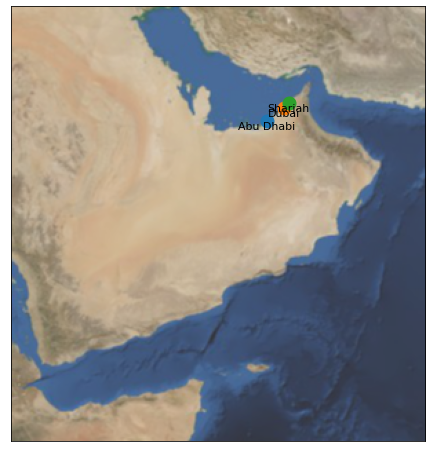

In [32]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=9, urcrnrlat=30,
            llcrnrlon=42, urcrnrlon=62, )

m.bluemarble(alpha = 0.8)

for c in loc:
    if c[0] in UAE:
        x,y = m(c[2],c[1])
        plt.plot(x, y, 'o', markersize=13)
        plt.text(x, y, c[0], fontsize=11,horizontalalignment='center',verticalalignment='top')

In [33]:
data = [go.Histogram(x = df1[df1['city'].isin(UAE)].city,marker=dict(color='#348feb', line=dict(color='#000000', width=2)))]
layout = go.Layout(title = 'Abu Dhabi hosted the most matches followed by Dubai',xaxis=dict(title='UAE Cities',tickmode='linear'),yaxis=dict(title='Count'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Most MOMs <a id="8"></a>

In [34]:
moms = df1['player_of_match'].value_counts()
fig = go.Figure([go.Bar(x=moms.index[:10], y= moms.values[:10],text = moms.values[:10],textposition='outside',marker=dict(color=random_colors(10), line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Most man of the match awards won ',xaxis=dict(title='Player',tickmode='linear'),yaxis=dict(title='Number of Awards'))
fig.update_layout(layout)
iplot(fig)

## Win Margin and Match-Win %<a id = '9'></a>

In [35]:
fig = px.violin(df1, y=df1[(df1['result'] == 'wickets')].result_margin, color = df1[(df1['result'] == 'wickets')].result,box=True,points='all')
layout = go.Layout(title = 'Wicket margin',yaxis=dict(title='Number of wickets'))
fig.update_layout(layout)
fig.show()

In [36]:
fig = px.violin(df1, y=df1[(df1['result'] == 'runs')].result_margin, color = df1[(df1['result'] == 'runs')].result,box=True,points='all')
layout = go.Layout(title = 'Run margin',yaxis=dict(title='Runs'))
fig.update_layout(layout)
fig.show()

In [37]:
match = df1["team1"].value_counts() + df1["team2"].value_counts()
winner = df1["winner"].value_counts()
teams = match.index; per = []
for i in teams:
    per.append(round((winner[i]/match[i])*100,2))
fig = go.Figure(data=[go.Table(
    header=dict(values=['Team', 'Win-Match %'],
                align='left'),
    cells=dict(values=[teams,per],
               align='left'))
])
layout = go.Layout(title = 'Win-Match %')
fig.update_layout(layout)
fig.update_layout(width=600, height=450)
fig.show()

## Toss<a id="10"></a>

### Most Toss Wins<a id="10a"></a>

In [38]:
toss = df1['toss_winner'].value_counts()
fig = go.Figure([go.Bar(x=toss.index, y= toss.values,text = toss.values,textposition='outside',marker=dict(color=random_colors(10), line=dict(color='#000000', width=2)))])
layout = go.Layout(title = 'Number of Toss won by teams',xaxis=dict(title='Teams',tickmode='linear'),yaxis=dict(title='Number of Toss Won'))
fig.update_layout(layout)
iplot(fig)

### What do teams choose after winning the toss<a id="10b"></a>

In [39]:
team = []; bat = []; field = []
for t in df1.toss_winner.unique():
    team.append(t)
    bat.append(df1[(df1['toss_decision'] == 'bat') & (df1['toss_winner'] == t)].toss_decision.count())
    field.append(df1[(df1['toss_decision'] == 'field') & (df1['toss_winner'] == t)].toss_decision.count())

fig = go.Figure(data=[
go.Bar(name='Bat', x=team, y=bat),
go.Bar(name='Field', x=team, y=field)])
fig.update_layout(barmode='stack')
fig.show()

### Impact of stadium on toss decision<a id="10c"></a>

In [40]:
stad = df1['venue'].value_counts()[:12]
stadium = []; bat = []; field = []
for t in stad.index:
    stadium.append(t)
    bat.append(df1[(df1['toss_decision'] == 'bat') & (df1['venue'] == t)].toss_decision.count())
    field.append(df1[(df1['toss_decision'] == 'field') & (df1['venue'] == t)].toss_decision.count())

fig = go.Figure(data=[
go.Bar(name='Bat', x=stadium, y=bat),
go.Bar(name='Field', x=stadium, y=field)])
fig.update_layout(barmode='stack')
fig.show()

### Impact of toss win on match win<a id="10d"></a>

In [41]:
a = np.equal(df1['toss_winner'],df1['winner']).value_counts()
fig = go.Figure(data=[go.Pie(labels=a.index, values=a.values, hole=.3)])
layout = go.Layout(title = 'Does toss win help you win the match')
fig.update_layout(layout)
fig.update_traces(textinfo='label + value',marker=dict(colors=random_colors(2), line=dict(color='#000000', width=2)))
iplot(fig)

## Average Runs scored in both innings in all seasons<a id="11"></a>

In [42]:
season=df2.groupby(['season','inning'])['total_runs'].sum().reset_index()
num_matches = df1['date'].str[:4].astype(int).value_counts(sort = False)

avg_1 = (season[season['inning']==1].total_runs)/num_matches.values
avg_2 = (season[season['inning']==2].total_runs)/num_matches.values

fig = {"data" : [{"x" : num_matches.index,"y" : avg_1,
                  "name" : "1st Innings Average Runs" ,"marker" : {"color" : "cyan","size": 12},
                  "line": {"width" : 3},"type" : "scatter","mode" : "lines+markers" },
        
                 {"x" : num_matches.index,"y" : avg_2,
                  "name" : "2nd Innings Average Runs","marker" : {"color" : "red","size": 12},
                  "type" : "scatter","line": {"width" : 3},"mode" : "lines+markers",
                  "xaxis" : "x2","yaxis" : "y2",}],
       
        "layout" : {"title": "Average runs per innings",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                    "showticklabels" : False},"margin" : {"b" : 111},
                    "yaxis2" : {"domain" : [.55, 1],"anchor" : "x2","title": "2nd Innings"},                    
                    "xaxis" : {"domain" : [0, 1],"tickmode":'linear',"title": "Year"},
                    "yaxis" : {"domain" :[0, .45], "title": "1st Innings"}}}

iplot(fig)

## 200+ runs games<a id="12"></a>

### 200+ runs game in 1st and 2nd innings<a id="12a"></a>

In [43]:
df3 = df.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
inn1 = df3[(df3['total_runs']>=200) & (df3['inning'] == 1 )].batting_team.value_counts()
inn2 = df3[(df3['total_runs']>=200) & (df3['inning'] == 2 )].batting_team.value_counts()

fig = make_subplots(
    rows=2, cols=1, specs=[[{'type':'domain'}], [{'type':'domain'}]],
    subplot_titles=("Inning 1", "Inning 2"))

fig.add_trace(go.Pie(labels=inn1.index, values=inn1.values, scalegroup='one',name = '1st Inning'), 1, 1)
fig.add_trace(go.Pie(labels=inn2.index, values=inn2.values, scalegroup='one', name = '2nd Inning'), 2, 1)

fig.update_layout(title_text='200+ scores by teams')
fig.update_traces(textinfo='label + value',marker=dict(colors=random_colors(9), line=dict(color='#000000', width=2)))
iplot(fig)

### Outcome of 200+ score matches<a id="12b"></a>

In [44]:
inn1 = df3[(df3['total_runs']>=200) & (df3['inning'] == 1 )]
inn2 = df3[df3['inning'] == 2]
inn = inn1[['id','inning','total_runs']].merge(inn2[['id', 'inning', 'total_runs']],on = 'id')
inn['win'] = np.where(inn['total_runs_x']<=inn['total_runs_y'], 'Yes', 'No')
a = inn['win'].value_counts()

fig = go.Figure(data=[go.Pie(labels=a.index, values=a.values, hole=.3)])
layout = go.Layout(title = 'How often does a team chase 200+ score')
fig.update_layout(layout)
fig.update_traces(textinfo='label + value',marker=dict(colors=random_colors(2), line=dict(color='#000000', width=2)))
iplot(fig)

## Distribution of runs in all seasons<a id="13"></a>

In [45]:
#Source https://www.kaggle.com/dude431/ipl-detailed-analysis#notebook-container

run_4 = df2.groupby(['season'])['batsman_runs'].agg(lambda x: (x==4).sum()*4).reset_index()
run_6 = df2.groupby(['season'])['batsman_runs'].agg(lambda x: (x==6).sum()*6).reset_index()
run_total = df2.groupby(['season'])['total_runs'].sum().reset_index()

fig = go.Figure(data=[
go.Bar(name='Runs by 6', x=run_6['season'], y=run_6['batsman_runs']),
go.Bar(name='Runs by 4', x=run_4['season'], y=run_4['batsman_runs']),
go.Bar(name='Remaining Runs', x=run_total['season'], y=run_total['total_runs']-(run_6['batsman_runs']+run_4['batsman_runs']))])
fig.update_layout(barmode='stack')
fig.show()

## Average runs given in each over<a id="14"></a>

In [46]:
#Source https://www.kaggle.com/dude431/ipl-detailed-analysis#notebook-container

runs_per_over = df.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=np.sum)
runs_per_over.reset_index(inplace=True)
number_of_over = df.pivot_table(index=['over'],columns='batting_team',aggfunc='size')
number_of_over.reset_index(inplace=True)

runs_per_over.drop(['Kochi Tuskers Kerala','Rising Pune Supergiants','Gujarat Lions'],axis=1,inplace=True)
number_of_over.drop(['Kochi Tuskers Kerala','Rising Pune Supergiants','Gujarat Lions'],axis=1,inplace=True)

a = df.batting_team.unique().tolist();a.remove('Kochi Tuskers Kerala');a.remove('Rising Pune Supergiants');a.remove('Gujarat Lions')

fig = go.Figure()
for i in a:
    fig.add_trace(go.Scatter(x=runs_per_over['over'],y = (runs_per_over[i]/number_of_over[i])*6,name=i))
iplot(fig)